In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
df[13] = wine.target
df.columns = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline', 'class']

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.3, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

cols = ['alcohal', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od_dilutedwines', 'proline']
X_train_std = pd.DataFrame(X_train_std, columns=cols)
X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [2]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [3]:
import numpy as np

importances = forest.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) class                          0.178209
 2) nonflavanoids_phenols          0.170896
 3) hue                            0.130607
 4) proline                        0.118767
 5) malic_acid                     0.108576
 6) od_dilutedwines                0.089635
 7) flavanoids                     0.056197
 8) ash                            0.039554
 9) total_phenols                  0.037642
10) magnesium                      0.024482
11) color_intensity                0.017584
12) ash_alcalinity                 0.016286
13) proanthocyanins                0.011564


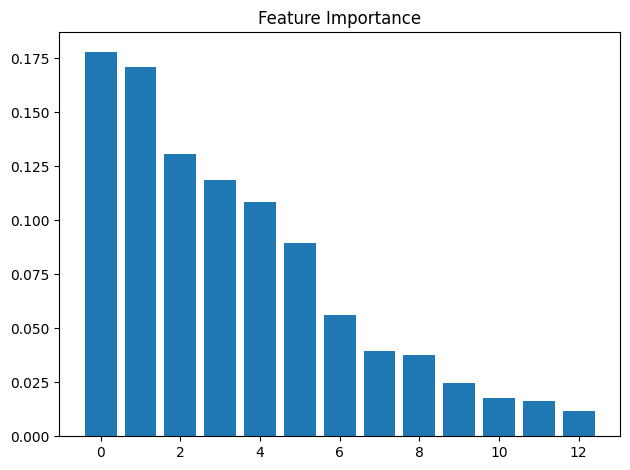

In [6]:
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()